In [2]:
Pkg.add("Optim")
using Optim
admissions = readdlm("binary.csv", ',');
y = admissions[:,1] # the binary value of being admitted or not
u = admissions[:,2:3]; # on the first column is the GRE, the second column is the GPA
u1 = u[:,1]/200;
u2 = u[:,2];
print(u1)

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Optim
INFO: Use `Pkg.update()` to get the latest versions of your packages


[1.9,3.3,4.0,3.2,2.6,3.8,2.8,2.0,2.7,3.5,4.0,2.2,3.8,3.5,3.5,2.4,3.9,1.8,4.0,2.7,2.5,3.3,3.0,3.4,3.8,4.0,3.1,2.6,3.9,2.6,2.7,3.8,3.0,4.0,1.8,2.0,2.9,2.6,2.5,2.6,2.8,2.9,3.0,2.5,3.5,2.3,2.9,2.5,2.2,2.0,3.2,2.2,3.7,3.4,3.3,3.7,2.8,1.9,2.0,3.0,3.1,2.8,3.2,3.4,2.9,3.0,3.7,3.1,2.9,4.0,3.2,1.5,2.4,2.9,3.6,3.6,2.8,4.0,2.7,3.1,3.5,3.1,2.5,1.9,2.5,2.6,3.0,3.0,3.5,3.3,3.5,3.6,4.0,2.9,3.3,3.3,3.2,2.4,3.5,2.0,1.7,2.9,1.9,2.7,3.3,3.7,3.5,2.4,2.0,2.4,3.4,2.1,1.8,3.0,3.6,3.1,2.2,3.5,4.0,1.7,2.6,2.4,2.6,2.5,3.6,2.7,3.0,3.7,2.7,2.3,3.1,3.2,2.9,2.5,2.8,2.5,2.8,3.5,3.1,3.0,3.2,3.5,3.1,2.9,2.9,1.9,2.4,2.8,2.4,3.7,4.0,2.0,3.2,2.9,3.1,2.9,2.8,2.4,3.3,3.5,3.0,3.2,3.5,2.6,2.9,3.5,2.2,3.6,2.5,3.0,2.0,2.7,3.4,4.0,2.5,3.1,2.6,3.1,3.1,1.5,3.1,2.5,3.5,2.7,2.5,4.0,2.8,2.9,2.8,2.5,3.2,4.0,3.2,1.9,3.0,2.8,3.3,2.0,3.0,2.9,4.0,2.9,3.5,2.1,3.0,3.9,3.7,3.2,2.7,2.9,3.7,2.9,2.3,3.2,3.0,3.3,1.7,2.3,2.3,2.8,2.7,3.4,2.4,4.0,4.0,3.6,3.1,2.7,2.4,3.6,2.9,3.0,1.9,2.1,4.0,3.1,3.3,2.4,2.5,3.5,2.2,2.6,3.4,3.1,2.7,4.0,3.4,2.2,3.4,3.2

In [7]:
number_of_data_points = size(u)[1]


# Minimization algorithm using gradient descent
# f  the objective function
# g  the gradient of f
# x  an initial testing point
# tolerance a small number
function minimize(f,g, x::Vector, tolerance, max_iter = 6000)
    alpha =0.3
    beta = 0.7
    iter = 0
    while sqrt(sum(g(x).^2)) > tolerance && iter < max_iter
        dx = -g(x)
        t = 1
        while f(x+t*dx) > f(x) + alpha*t*sum(g(x).*dx)
            t = beta*t
        end
        x = x + t*dx
        iter = iter + 1
        print("$iter, ")
    end
    return x
end

# Objective function
function f(x::Vector)
    a1 = x[1]
    a2 = x[2]
    b = x[3]
    X = [(a1*u1[i] + a2*u2[i] +b)::Float64 for i in 1:number_of_data_points]
    return -sum(X.*y - log(1+exp(X)))
end

# Gradient of the objective function, in this case, it was computed analytically
function g(x::Vector)
    a1 = x[1]
    a2 = x[2]
    b = x[3]
    X = [(a1*u1[i] + a2*u2[i] +b)::Float64 for i in 1:number_of_data_points]
    partial_a1 = -sum(u1.*y - (1./(1+exp(X))).*u1.*exp(X))
    partial_a2 = -sum(u2.*y - (1./(1+exp(X))).*u2.*exp(X))
    partial_b  = -sum(y - (1./(1+exp(X))).*exp(X))
    return [partial_a1, partial_a2, partial_b]
end

println(f([0,0,0]))
println(g([0,0,0]))
println(g([0.002690705693710623,0.7547090844083586,-4.949470398638139]))
m = minimize(f,g,[0,0,0], 0.01)
print("minimizer = $m, minimum value = $(f(m))")


277.25887222397836
[194.69999999999996,234.85000000000005,73.0]
[-288.63670587600814,-321.68491630574766,-92.16406699849091]
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197

In [17]:
optimize(f,[0.0026905516509482773,0.7547515986724577,3]) # Cheating

Results of Optimization Algorithm
 * Algorithm: Nelder-Mead
 * Starting Point: [0.0026905516509482773,0.7547515986724577,3.0]
 * Minimum: [0.5381536944245158,0.7547020664257043,-4.949491235268547]
 * Value of Function at Minimum: 240.171991
 * Iterations: 90
 * Convergence: true
   * |x - x'| < NaN: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-08: true
   * |g(x)| < NaN: false
   * Exceeded Maximum Number of Iterations: false
 * Objective Function Calls: 174
 * Gradient Call: 0

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Loading help data...


alpha1 = 0.5376435265939089
alpha2 = 0.7517819395995624
beta = -4.937731489335135


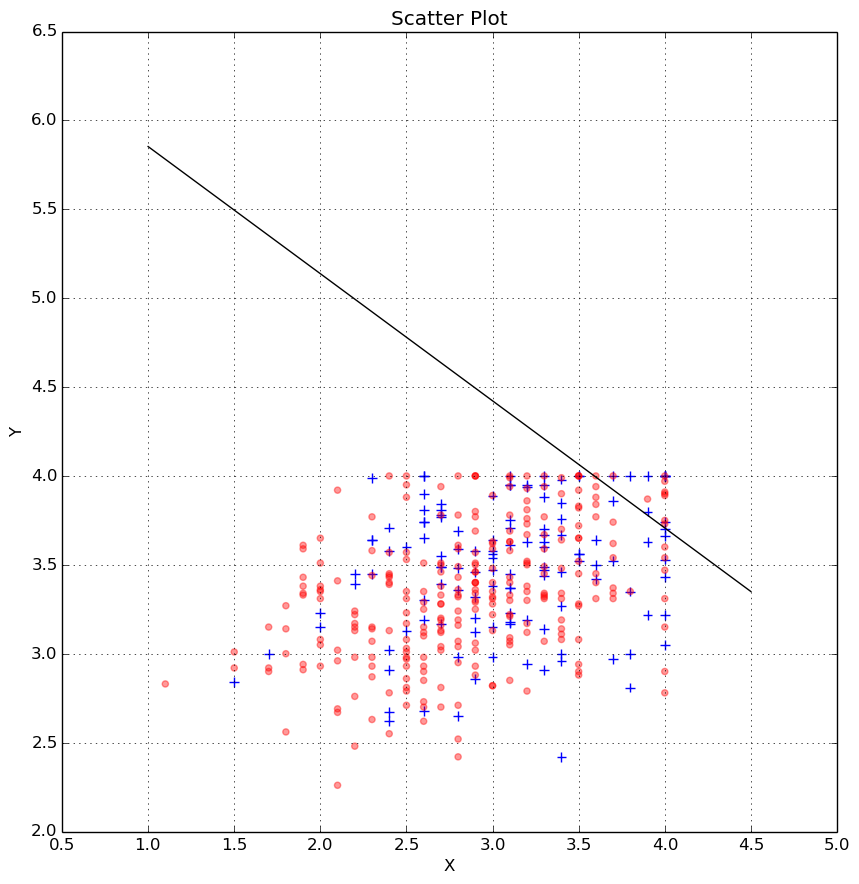

In [8]:
Pkg.add("PyPlot")
using PyPlot

#################
#  Create Data  #
#################
X = u1
Y = u2
areas1 = 10
areas0 = 5

# Gives the index of i such that y[i]==1 if admitted, y[i]==0 if rejected
admitted = filter(i -> y[i]==1, 1:number_of_data_points)
rejected = filter(i -> y[i]==0, 1:number_of_data_points)

X1 = [X[i] for i in admitted]
Y1 = [Y[i] for i in admitted]

X2 = [X[i] for i in rejected]
Y2 = [Y[i] for i in rejected]
##################
#  Scatter Plot  #
##################
fig = figure("pyplot_scatterplot",figsize=(10,10))
ax = axes()
scatter(X1,Y1, marker ="+", color = "b", s=50)
scatter(X2,Y2, marker ="o", color = "r", alpha=0.4)
(alpha1, alpha2, beta) = [0.5376435265939089,0.7517819395995624,-4.937731489335135]
print("alpha1 = ")
println(alpha1)
print("alpha2 = ")
println(alpha2)
print("beta = ")
println(beta)

#alpha1 = 0.0026905516509482773
#alpha2 = 0.7547515986724577
#beta = -4.949523969881174
r = 1:(0.1/50):4.5
plot(r,(-alpha1*r - beta)/(alpha2), "k")
title("Scatter Plot")
xlabel("X")
ylabel("Y")
grid("on")


In [7]:
#=
Results of Optimization Algorithm
 * Algorithm: Nelder-Mead
 * Starting Point: [0.0026905516509482773,0.7547515986724577,3.0]
 * Minimum: [0.002690705693710623,0.7547090844083586,-4.949470398638139]
 * Value of Function at Minimum: 240.171991
 * Iterations: 96
 * Convergence: true
   * |x - x'| < NaN: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-08: true
   * |g(x)| < NaN: false
   * Exceeded Maximum Number of Iterations: false
 * Objective Function Calls: 180
 * Gradient Call: 0
=#